In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import f1_score
plt.rcParams["font.family"] = "SF Pro Display"

In [272]:
all_labels = np.load('rst_model_base/output_all_labels.npy')
final_preds = np.load('rst_model_base/output_preds.npy')
final_logit = np.load('rst_model_base/output_logits.npy')

In [273]:
print(len(all_labels), len(final_preds), len(final_logit))

2089 2089 1


In [274]:
np.unique(all_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [275]:
np.unique(final_preds)

array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15])

In [276]:
label_list = ['evaluation', 'topic-change', 'background', 'explanation','contrast', 'elaboration', 'cause', 'summary', 'manner-means', 'joint','topic-comment', 'condition', 'attribution', 'enablement', 'temporal','comparison']
label_map = {label : i for i, label in enumerate(label_list)}
label_map

{'evaluation': 0,
 'topic-change': 1,
 'background': 2,
 'explanation': 3,
 'contrast': 4,
 'elaboration': 5,
 'cause': 6,
 'summary': 7,
 'manner-means': 8,
 'joint': 9,
 'topic-comment': 10,
 'condition': 11,
 'attribution': 12,
 'enablement': 13,
 'temporal': 14,
 'comparison': 15}

In [277]:
unique, counts = np.unique(all_labels, return_counts=True)
true_counts = dict(zip(unique, counts))
true_counts

{0: 80,
 1: 7,
 2: 111,
 3: 110,
 4: 146,
 5: 796,
 6: 82,
 7: 32,
 8: 27,
 9: 140,
 10: 24,
 11: 48,
 12: 343,
 13: 46,
 14: 68,
 15: 29}

#### Confusion Matrix

In [278]:
cm = confusion_matrix(all_labels, final_preds)
cm

array([[  1,   0,   0,   7,   4,  55,   1,   1,   0,   7,   0,   0,   3,
          0,   0,   1],
       [  0,   0,   0,   0,   0,   7,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  1,   0,  33,   5,   5,  38,   5,   0,   3,   7,   0,   1,   5,
          1,   5,   2],
       [  0,   0,   1,  32,   2,  64,   5,   0,   0,   2,   0,   0,   3,
          1,   0,   0],
       [  0,   0,   3,   6,  80,  38,   0,   0,   0,   5,   0,   2,   5,
          0,   4,   3],
       [  2,   0,   4,  21,  12, 705,  10,   1,   1,  14,   0,   1,  11,
         10,   4,   0],
       [  0,   0,   2,   6,   9,  31,  17,   0,   1,   8,   0,   0,   4,
          0,   4,   0],
       [  0,   0,   0,   2,   1,  16,   1,  12,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   1,   1,   1,   9,   0,   0,  12,   0,   0,   0,   1,
          1,   1,   0],
       [  1,   0,   1,   1,   6,  47,   4,   0,   0,  72,   0,   2,   1,
          1,   3,   1],
       [  1,   0,   0,   1,   

#### Overall Accuracy

In [279]:
rst_accuracy = (final_preds == all_labels).mean()
print(rst_accuracy)
round(rst_accuracy*100, 2)

0.6706558161799904


67.07

#### Accuracy Per Class

In [280]:
cm_results = {}
for k,v in label_map.items():
    cm_results[k] = (cm[v][v])/true_counts[v]

In [281]:
cm_results['Overall'] = rst_accuracy

In [282]:
cm_results

{'evaluation': 0.0125,
 'topic-change': 0.0,
 'background': 0.2972972972972973,
 'explanation': 0.2909090909090909,
 'contrast': 0.547945205479452,
 'elaboration': 0.885678391959799,
 'cause': 0.2073170731707317,
 'summary': 0.375,
 'manner-means': 0.4444444444444444,
 'joint': 0.5142857142857142,
 'topic-comment': 0.0,
 'condition': 0.6875,
 'attribution': 0.9620991253644315,
 'enablement': 0.7391304347826086,
 'temporal': 0.36764705882352944,
 'comparison': 0.5172413793103449,
 'Overall': 0.6706558161799904}

In [283]:
df_results = pd.DataFrame(cm_results.items(), columns=['Relation', 'Accuracy'])
df_results

,Relation,Accuracy
0,evaluation,0.012500
1,topic-change,0.000000
2,background,0.297297
3,explanation,0.290909
4,contrast,0.547945
5,elaboration,0.885678
6,cause,0.207317
7,summary,0.375000
8,manner-means,0.444444
9,joint,0.514286


In [191]:
df_results.to_csv("rst_model_base/accuracy_results.csv", index=False)

In [182]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(12, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)

#     plt.clim(0,1.1)
#     cbar = plt.colorbar()
#     plt.colorbar(cax=np.arange(0,1.1,0.1))
    plt.colorbar()


    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45,ha="right",
             rotation_mode="anchor", fontsize=13)
        plt.yticks(tick_marks, target_names,fontsize=13)
      

    

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center", fontsize=11,
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",fontsize=12,
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel=('Predicted label')
    plt.tight_layout()

#     plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))  
    if normalize:
        plt.savefig('rst_model_base/Confusion_Matrix_Norm.jpg', dpi = 300)
    else:
        plt.savefig('rst_model_base/Confusion_Matrix.jpg', dpi = 300)


    plt.show()

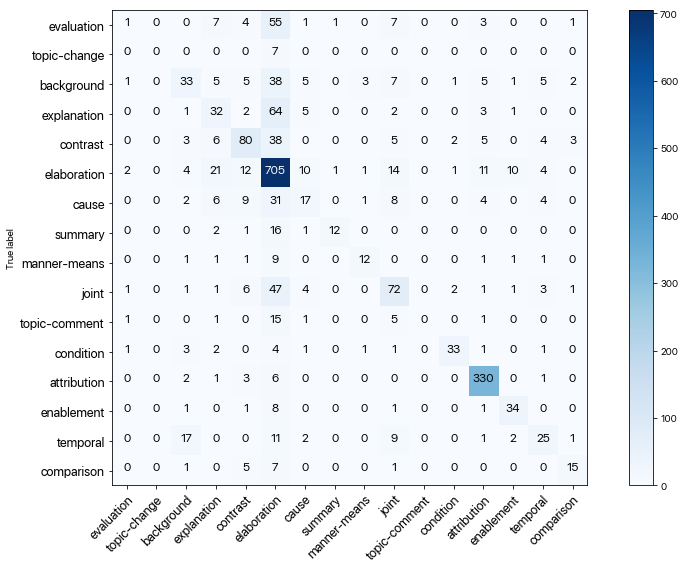

In [254]:
plot_confusion_matrix(cm, normalize    = False,
                      target_names = label_list,
                      title        = "Confusion Matrix")

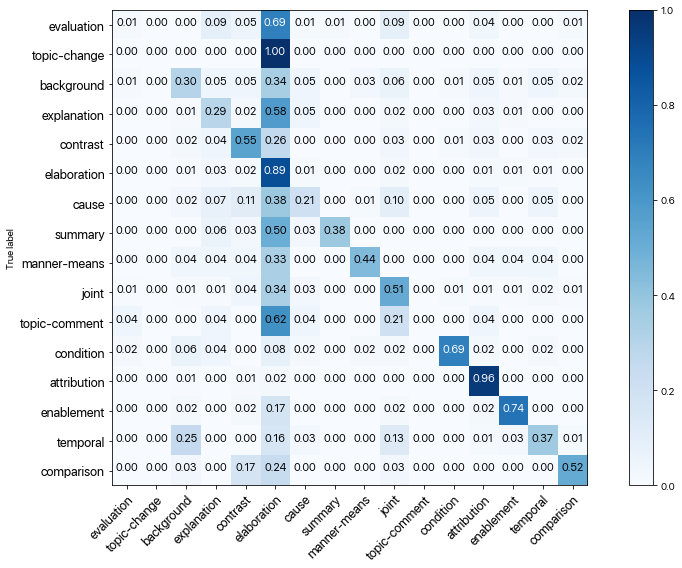

In [164]:
plot_confusion_matrix(cm, normalize    = True,
                      target_names = label_list,
                      title        = "Confusion Matrix")

In [233]:
f1_mirco = f1_score(all_labels, final_preds, average='micro') 
f1_mirco

0.6706558161799904

In [234]:
f1_weighted = f1_score(all_labels, final_preds, average='weighted') 
f1_weighted

/Users/shagun/anaconda/envs/nlp/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6360413099698353

In [235]:
f1_macro = f1_score(all_labels, final_preds, average='macro') 
f1_macro

/Users/shagun/anaconda/envs/nlp/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4569691766208358

In [238]:
f1_relations = f1_score(all_labels, final_preds, average=None)
f1_relations

/Users/shagun/anaconda/envs/nlp/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.02, 0.  , 0.37, 0.33, 0.58, 0.76, 0.26, 0.52, 0.53, 0.53, 0.  ,
       0.76, 0.93, 0.71, 0.43, 0.58])

In [242]:
f1_results = {}
for k,v in label_map.items():
    f1_results[k] = f1_relations[v]
f1_results

{'evaluation': 0.022988505747126436,
 'topic-change': 0.0,
 'background': 0.3666666666666667,
 'explanation': 0.3282051282051282,
 'contrast': 0.5818181818181818,
 'elaboration': 0.7592891760904685,
 'cause': 0.2635658914728682,
 'summary': 0.5217391304347825,
 'manner-means': 0.5333333333333333,
 'joint': 0.5294117647058822,
 'topic-comment': 0.0,
 'condition': 0.7586206896551724,
 'attribution': 0.9295774647887324,
 'enablement': 0.7083333333333334,
 'temporal': 0.43103448275862066,
 'comparison': 0.576923076923077}

In [246]:
f1_results['Micro'] = f1_mirco
f1_results['Macro'] = f1_macro
f1_results['Weighted'] = f1_weighted

In [247]:
f1_results

{'evaluation': 0.022988505747126436,
 'topic-change': 0.0,
 'background': 0.3666666666666667,
 'explanation': 0.3282051282051282,
 'contrast': 0.5818181818181818,
 'elaboration': 0.7592891760904685,
 'cause': 0.2635658914728682,
 'summary': 0.5217391304347825,
 'manner-means': 0.5333333333333333,
 'joint': 0.5294117647058822,
 'topic-comment': 0.0,
 'condition': 0.7586206896551724,
 'attribution': 0.9295774647887324,
 'enablement': 0.7083333333333334,
 'temporal': 0.43103448275862066,
 'comparison': 0.576923076923077,
 'Micro': 0.6706558161799904,
 'Macro': 0.4569691766208358,
 'Weighted': 0.6360413099698353}

In [248]:
df_results_f1 = pd.DataFrame(f1_results.items(), columns=['Relation', 'F1-Score'])
df_results_f1

,Relation,F1-Score
0,evaluation,0.022989
1,topic-change,0.000000
2,background,0.366667
3,explanation,0.328205
4,contrast,0.581818
5,elaboration,0.759289
6,cause,0.263566
7,summary,0.521739
8,manner-means,0.533333
9,joint,0.529412


In [249]:
df_results_f1.to_csv("rst_model_base/f1_results.csv", index=False)